# 抓取比特幣、以太幣、萊特幣

In [1]:
import requests
import pandas as pd

In [2]:
btcUrl = "https://www.coingecko.com/price_charts/1/usd/max.json"
ethUrl = "https://www.coingecko.com/price_charts/279/usd/max.json"
ltcUrl = "https://www.coingecko.com/price_charts/2/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}

In [3]:
def DataFrame_Coin(url, url_head):
    data = requests.get(url, headers = url_headers)
    # 資料為json格式
    prices = data.json()['stats']
    # 轉成dataframe
    df = pd.DataFrame(prices)
    df.columns = ['datetime', 'usd']
    # 將datetime欄位轉成日期格式, 資料取樣為天
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    # 轉成時間序列
    df.index = df['datetime']
    # 回傳
    return df

In [4]:
btc = DataFrame_Coin(btcUrl, url_headers)
eth = DataFrame_Coin(ethUrl, url_headers)
ltc = DataFrame_Coin(ltcUrl, url_headers)

In [5]:
# 取2018年以後
btc1 = btc[btc['datetime'] >= '2018-01-01']
eth1 = eth[eth['datetime'] >= '2018-01-01']
ltc1 = ltc[ltc['datetime'] >= '2018-01-01']

In [6]:
coinDF = pd.concat([btc1, eth1['usd'], ltc1['usd']], axis=1)
coinDF.columns = ['datetime', 'BTC', 'ETH', 'LTC']
coinDF.head(10)

,datetime,BTC,ETH,LTC
datetime,,,,
2018-01-01,2018-01-01,14093.606831,776.080330,230.462120
2018-01-02,2018-01-02,15321.932852,876.890259,255.048185
2018-01-03,2018-01-03,15583.885538,963.055751,248.042194
2018-01-04,2018-01-04,15976.365194,978.416104,244.834372
2018-01-05,2018-01-05,18336.922980,1004.894972,254.138525
2018-01-06,2018-01-06,18343.662493,1052.023360,289.930033
2018-01-07,2018-01-07,17039.873914,1137.654919,278.975982
2018-01-08,2018-01-08,15900.365022,1184.923930,263.746383
2018-01-09,2018-01-09,15604.723408,1361.439668,258.719965


Populating the interactive namespace from numpy and matplotlib


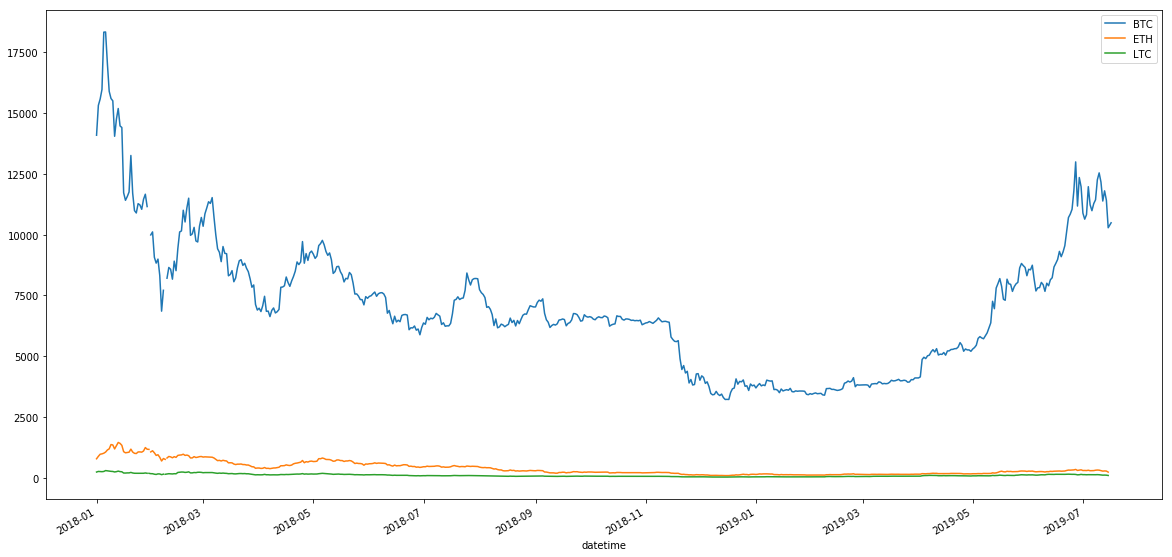

In [7]:
%pylab inline
coinDF[['BTC','ETH','LTC']].plot(kind = 'line', figsize=[20, 10])